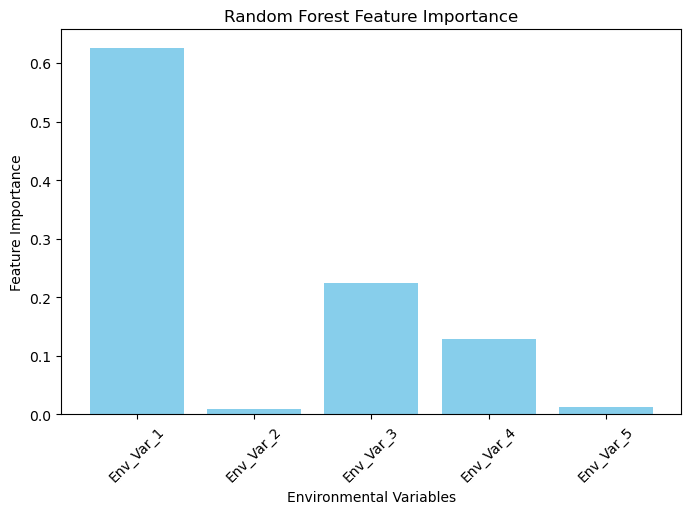

Random Forest R^2 score on test set: 0.9346055429458641


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate a sample dataset
np.random.seed(42)
num_samples = 200
num_features = 5

# Simulate environmental variables (independent variables)
X = pd.DataFrame(
    np.random.rand(num_samples, num_features),
    columns=[f"Env_Var_{i+1}" for i in range(num_features)]
)

# Simulate a dependent variable with some relationship to the environmental variables
y = (
    3 * X["Env_Var_1"]
    - 2 * X["Env_Var_3"]
    + 1.5 * X["Env_Var_4"]
    + np.random.normal(scale=0.1, size=num_samples)
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importance
feature_importances = rf.feature_importances_

# Visualize feature importance
plt.figure(figsize=(8, 5))
plt.bar(X.columns, feature_importances, color='skyblue')
plt.xlabel("Environmental Variables")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.xticks(rotation=45)
plt.show()

# Evaluate model performance
print("Random Forest R^2 score on test set:", rf.score(X_test, y_test))
